In [1]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

# 1. Importing Libraries

In [2]:
# importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# 2. Reading Data

In [3]:
# reading country data and printing first 5 rows

data = pd.read_csv("Country-data.csv")
data.head(5)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

#### Column Name:	Description
- <b>country:</b>	Name of the country<br>
- <b>child_mort:</b>	Death of children under 5 years of age per 1000 live births<br>
- <b>exports:</b>	Exports of goods and services per capita. Given as %age of the GDP per capita<br>
- <b>health:</b>	Total health spending per capita. Given as %age of GDP per capita<br>
- <b>imports:</b>	Imports of goods and services per capita. Given as %age of the GDP per capita<br>
- <b>Income:</b>	Net income per person<br>
- <b>Inflation:</b>	The measurement of the annual growth rate of the Total GDP<br>
- <b>life_expec:</b>	The average number of years a new born child would live if the current mortality patterns are to remain the same<br>
- <b>total_fer:</b>	The number of children that would be born to each woman if the current age-fertility rates remain the same.<br>
- <b>gdpp:</b>	The GDP per capita. Calculated as the Total GDP divided by the total population.<br>

# 3. Cleaning Data

####  <span style="color: red;"> Check 1a:</span> Counting Rows & Columns

In [4]:
data_initial_rows=len(data)
data_initial_columns=len(data.columns)
print("No. of rows:",data_initial_rows) # no. of rows in data 
print("No. of columns:",data_initial_columns) # no. of columns in data
print("No. of values:",data.size) # no. of cells in data dataframe

No. of rows: 167
No. of columns: 10
No. of values: 1670


####  <span style="color: red;"> Check 1b:</span> Count of Missing Values in each Column

In [5]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> <b>No missing values</b>
</div>

####  <span style="color: red;"> Check 1c:</span> Checking no. of duplicate values

In [6]:
print("Data shape before:",data.shape)
data.drop_duplicates(inplace = True)
print("Data shape after:",data.shape)

Data shape before: (167, 10)
Data shape after: (167, 10)


<div class="alert alert-block alert-info">
<b>Note:</b> <b>No duplicate values</b>
</div>

## 3.1 Data Types

In [7]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


## 3.2 Data Description

In [8]:
# Data description

data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

## 3.3 Standardising data

- Converting percentage values to actual values for health, exports, imports
- Renaming Column names for clarity
- Rearranging columns to group them for further analysis
- Rounding off upto 2 decimal places

In [9]:
# Converting percentage values to actual values for health, exports, imports
data['Health'] = (data['health']*data['gdpp'])/100
data['Exports'] = (data['exports']*data['gdpp'])/100
data['Imports'] = (data['imports']*data['gdpp'])/100


# dropping old percentage value columns for health, exports, imports
data.drop(['health', 'exports', 'imports'], axis = 1)


# Renaming Column names for clarity
name = {'country':'Country',
        'child_mort':'Child mortality', 
        'income':'Income',
        'inflation':'Inflation',
        'life_expec':'Life expectancy',
        'total_fer':'Total fertility',
        'gdpp':'GDP'}
data.rename(columns = name, inplace = True)


# Rearranging columns to group them for further analysis
columns_titles = ['Country', 'Child mortality', 'Health', 'Life expectancy', 'Total fertility',
                  'Income', 'Inflation', 'Exports', 'Imports', 'GDP']
data=data.reindex(columns=columns_titles)


# Rounding off upto 2 decimal places
data = data.round(2)


data.head()

Country  Child mortality  Health  Life expectancy  \
0          Afghanistan             90.2   41.92             56.2   
1              Albania             16.6  267.90             76.3   
2              Algeria             27.3  185.98             76.5   
3               Angola            119.0  100.60             60.1   
4  Antigua and Barbuda             10.3  735.66             76.8   

   Total fertility  Income  Inflation  Exports  Imports    GDP  
0             5.82    1610       9.44    55.30   248.30    553  
1             1.65    9930       4.49  1145.20  1987.74   4090  
2             2.89   12900      16.10  1712.64  1400.44   4460  
3             6.16    5900      22.40  2199.19  1514.37   3530  
4             2.13   19100       1.44  5551.00  7185.80  12200

In [10]:
data.describe()

Child mortality       Health  Life expectancy  Total fertility  \
count       167.000000   167.000000       167.000000       167.000000   
mean         38.270060  1056.733174        70.555689         2.947964   
std          40.328931  1801.408921         8.893172         1.513848   
min           2.600000    12.820000        32.100000         1.150000   
25%           8.250000    78.535000        65.300000         1.795000   
50%          19.300000   321.890000        73.100000         2.410000   
75%          62.100000   976.940000        76.800000         3.880000   
max         208.000000  8663.600000        82.800000         7.490000   

              Income   Inflation        Exports        Imports            GDP  
count     167.000000  167.000000     167.000000     167.000000     167.000000  
mean    17144.688623    7.781737    7420.618862    6588.352096   12964.155689  
std     19278.067698   10.570770   17973.885789   14710.810423   18328.704809  
min       609.000000   -4.210000       1.080000       0.650000     231.000000  
25%      3355.000000    1.810000     447.140000     640.215000    1330.000000  
50%      9960.000000    5.390000    1777.440000    2045.580000    4660.000000  
75%     22800.000000   10.750000    7278.000000    7719.600000   14050.000000  
max    125000.000000  104.000000  183750.000000  149100.000000  105000.000000

# 4. Univariate Analysis

## 4.1 Data Distribution

### Boxplots

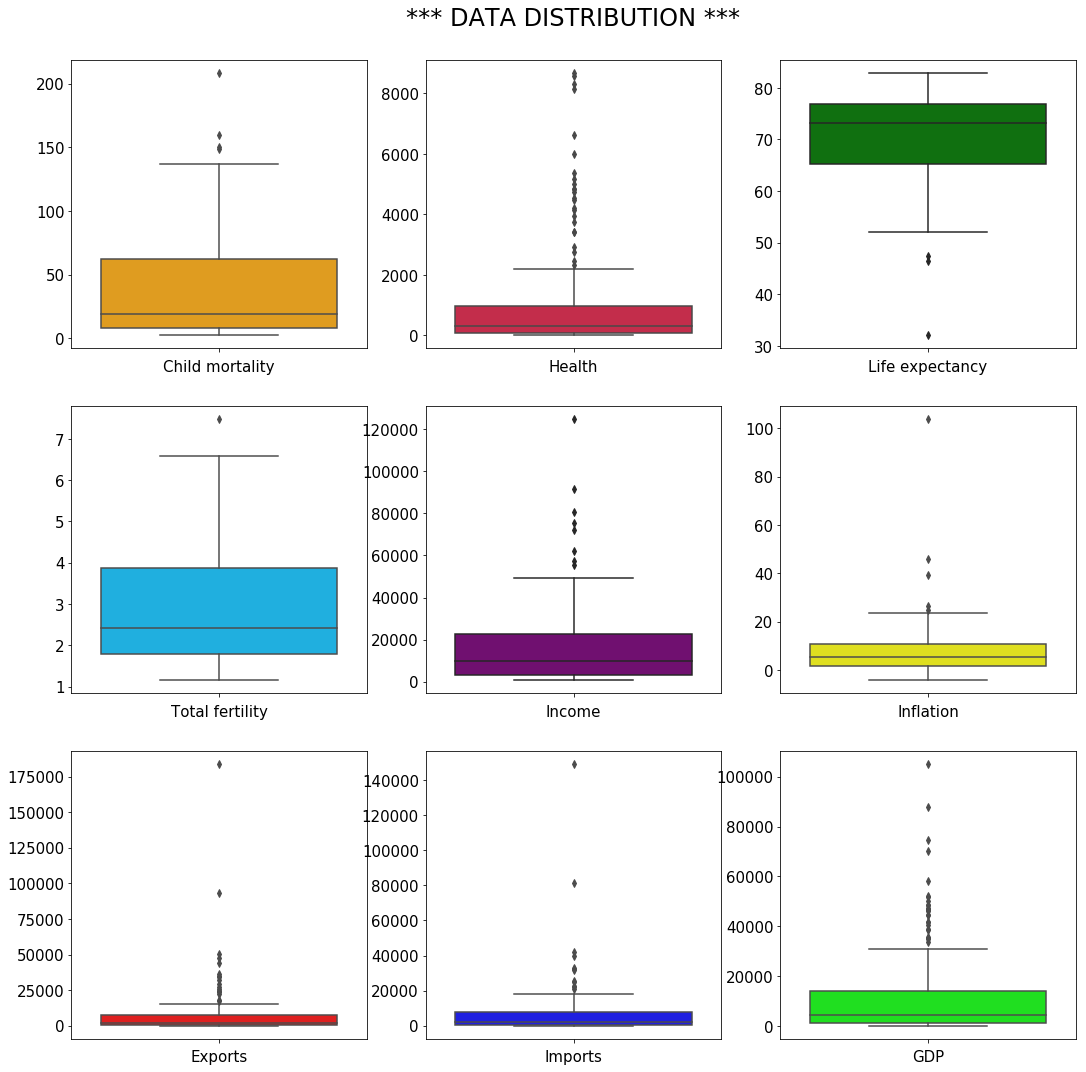

In [11]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(3, 3, figsize=(18,18))
plt.title('*** DATA DISTRIBUTION ***', x=-0.7,  y=3.5, fontsize='24')

sns.boxplot(data['Child mortality'], ax=ax[0][0], color='orange', orient='v' )
ax[0][0].set(xlabel='Child mortality', ylabel='')
sns.boxplot(data['Health'], ax=ax[0][1], color='crimson', orient='v')
ax[0][1].set(xlabel='Health', ylabel='')
sns.boxplot(data['Life expectancy'], ax=ax[0][2], color='green', orient='v')
ax[0][2].set(xlabel='Life expectancy', ylabel='')

sns.boxplot(data['Total fertility'], ax=ax[1][0], color='deepskyblue', orient='v' )
ax[1][0].set(xlabel='Total fertility', ylabel='')
sns.boxplot(data['Income'], ax=ax[1][1], color='purple', orient='v')
ax[1][1].set(xlabel='Income', ylabel='')
sns.boxplot(data['Inflation'], ax=ax[1][2], color='yellow', orient='v')
ax[1][2].set(xlabel='Inflation', ylabel='')

sns.boxplot(data['Exports'], ax=ax[2][0], color='red', orient='v' )
ax[2][0].set(xlabel='Exports', ylabel='')
sns.boxplot(data['Imports'], ax=ax[2][1], color='blue', orient='v')
ax[2][1].set(xlabel='Imports', ylabel='')
sns.boxplot(data['GDP'], ax=ax[2][2], color='lime', orient='v')
ax[2][2].set(xlabel='GDP', ylabel='')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> All the columns have tolerable amount of outliers so we'll leave them as they are.
</div>

###  Distribution plots

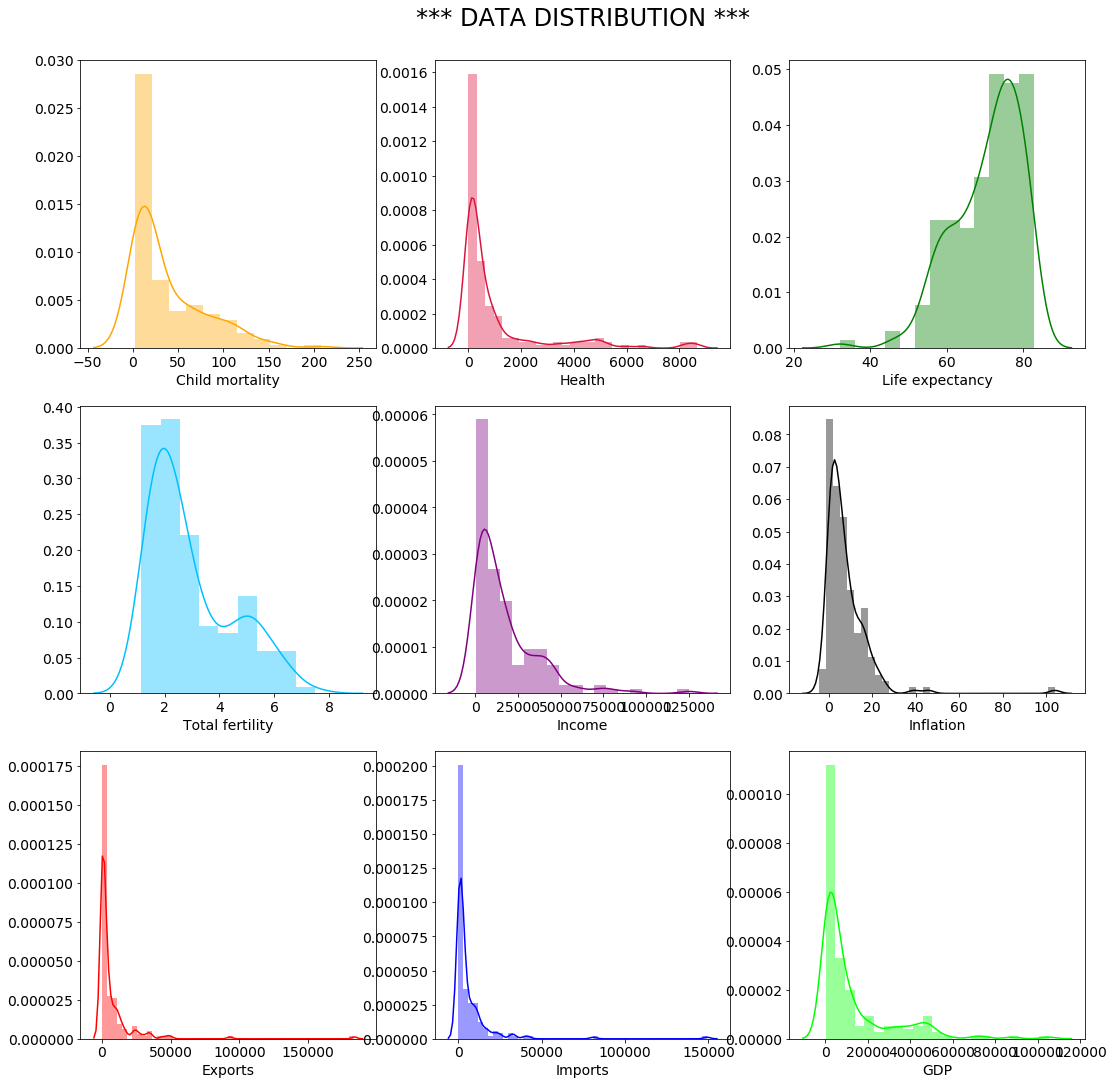

In [12]:
plt.rcParams['font.size'] = 14
fig, ax = plt.subplots(3, 3, figsize=(18,18))
plt.title('*** DATA DISTRIBUTION ***', x=-0.7,  y=3.5, fontsize='24')

sns.distplot(data['Child mortality'], ax=ax[0][0], color='orange')
ax[0][0].set(xlabel='Child mortality', ylabel='')
sns.distplot(data['Health'], ax=ax[0][1], color='crimson')
ax[0][1].set(xlabel='Health', ylabel='')
sns.distplot(data['Life expectancy'], ax=ax[0][2], color='green')
ax[0][2].set(xlabel='Life expectancy', ylabel='')

sns.distplot(data['Total fertility'], ax=ax[1][0], color='deepskyblue')
ax[1][0].set(xlabel='Total fertility', ylabel='')
sns.distplot(data['Income'], ax=ax[1][1], color='purple')
ax[1][1].set(xlabel='Income', ylabel='')
sns.distplot(data['Inflation'], ax=ax[1][2], color='black')
ax[1][2].set(xlabel='Inflation', ylabel='')

sns.distplot(data['Exports'], ax=ax[2][0], color='red')
ax[2][0].set(xlabel='Exports', ylabel='')
sns.distplot(data['Imports'], ax=ax[2][1], color='blue')
ax[2][1].set(xlabel='Imports', ylabel='')
sns.distplot(data['GDP'], ax=ax[2][2], color='lime')
ax[2][2].set(xlabel='GDP', ylabel='')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Most of the columns are positively skewed.
</div>

# 5. Bivariate Analysis

### Scatter plot for all the GDP vs other features

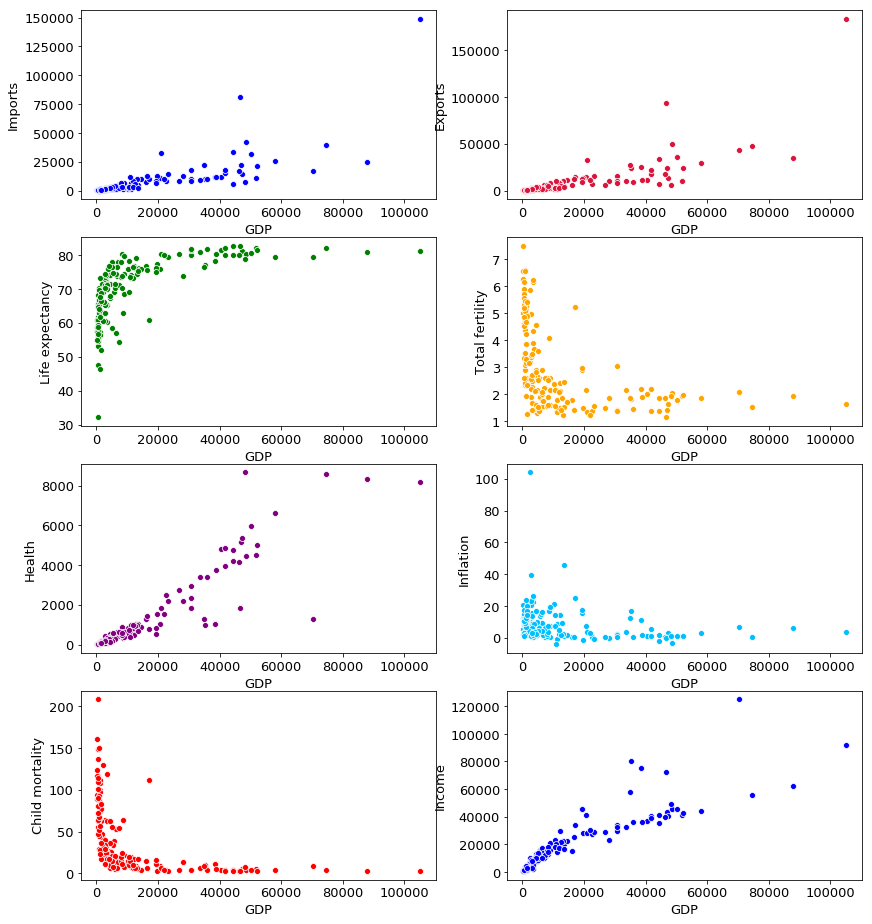

In [13]:
plt.rcParams['font.size'] = 13
fig, ax = plt.subplots(4, 2, figsize=(14, 16))
sns.scatterplot(x=data["GDP"], y=data["Imports"], ax=ax[0][0], color='blue')
sns.scatterplot(x=data["GDP"], y=data["Exports"], ax=ax[0][1], color='crimson')
sns.scatterplot(x=data["GDP"], y=data["Life expectancy"], ax=ax[1][0], color='green')
sns.scatterplot(x=data["GDP"], y=data["Total fertility"], ax=ax[1][1], color='orange')
sns.scatterplot(x=data["GDP"], y=data["Health"], ax=ax[2][0], color='purple')
sns.scatterplot(x=data["GDP"], y=data["Inflation"], ax=ax[2][1], color='deepskyblue')
sns.scatterplot(x=data["GDP"], y=data["Child mortality"], ax=ax[3][0], color='red')
sns.scatterplot(x=data["GDP"], y=data["Income"], ax=ax[3][1], color='blue')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> We'll be focusing on last two graphs i.e., child mortality and Income
</div>

# 6. Breaking down the problem through EDA

#### `Ignore the following code and just pay attention to the output yielded`

In [14]:
# Ignore the following code and just pay attention to the output yielded

Idea = [['countries', '', 'countries', 'Lowest', 'countries', 'Lowest'],
        ['countries', '', 'countries', 'Average', 'countries', 'Average'],
        ['countries', '', 'countries', 'High', 'countries', 'High'],
        ['countries', 'Low', 'countries', '', 'countries', ''],
        ['countries', 'Average', 'countries', '', 'countries', ''],
        ['countries', 'Highest', 'countries', '', 'countries', '']]
  
plan = pd.DataFrame(Idea, columns = ['-', 'Mortality', '--', 'Income', '---', 'GDP']) 
# plan.set_index("Features", inplace = True)  


def styling_specific_cell(x):
    color1 = 'background-color: yellow;'
    color2 = 'background-color: lime;'
    color3 = 'background-color: cyan;'
    color4 = 'background-color: #FFF68F;'
    color5 = 'background-color: #CAFF70;'
    color6 = 'background-color: lightcyan;'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[5,1] = color1 
    df_styler.iloc[0,3] = color2
    df_styler.iloc[0,5] = color3
    j=0
    for i in range(6):
        df_styler.iloc[i, j] = color4
    j=2
    for i in range(6):
        df_styler.iloc[i, j] = color5
    j=4
    for i in range(6):
        df_styler.iloc[i, j] = color6
    return df_styler


plan = plan.style.apply(styling_specific_cell, axis = None)
plan

<div class="alert alert-block alert-success">
<b>Note:</b> This dataframe simply shows country distribution. Here we are taking countries in the <i>bottom half of the Child mortality, upper half of the Income and upper half of GDP</i> by their actual numeric values when they are in ascending order.
        <ul>
              Plan here is to focus only on countries that have:
              <li><b>Highiest Child Mortality</b></li>
              <li><b>Lowest Income</b></li>
              <li><b>Lowest GDP </b></li>
        </ul>
Countries common in these 3 conditions given above will be in the dire need of the aid. Following 4 kinds of classifications will be needed to study closely.
</div>

## Consider following 4 classifications:

<div class="alert alert-block alert-danger">
    <ol>
<li>Countries `above avg mortality` & Countries `below avg GDP`</li>
<li>Countries `below avg income` & Countries `below avg GDP`</li>
<li>Countries `above avg mortality` & Countries `below avg Income`</li>
<li>Countries `above avg mortality`, Countries `below avg GDP` & Countries `below avg Income`</li>
    </ol>
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> Since <i>average</i> i.e., 50th quantile divides the distribution into half so we will condider classifications from the <i>bottom half of the Child mortality, upper half of the Income and GDP</i> list as per the plan.
</div>

In [15]:
# Taking new data only to focus on 3 features 'Child mortality', 'Income', 'GDP'

new_data = data[['Country', 'Child mortality', 'Income', 'GDP']]
print(new_data.shape)
new_data.head()

(167, 4)


Country  Child mortality  Income    GDP
0          Afghanistan             90.2    1610    553
1              Albania             16.6    9930   4090
2              Algeria             27.3   12900   4460
3               Angola            119.0    5900   3530
4  Antigua and Barbuda             10.3   19100  12200

### i. Countries common in higher half of child mortality and lower half of GDP

In [16]:
A = new_data['Child mortality'].quantile(0.50)  # bisecting data
B = new_data['GDP'].quantile(0.50)  # bisecting data
classification_1 = new_data.loc[(new_data['Child mortality'] >= A) & (new_data['GDP'] <= B)]
print(classification_1.shape)
classification_1.sort_values("Child mortality", axis = 0, ascending = False, inplace = True)
classification_1.head(5)

(70, 4)


Country  Child mortality  Income  GDP
66                      Haiti            208.0    1500  662
132              Sierra Leone            160.0    1220  399
32                       Chad            150.0    1930  897
31   Central African Republic            149.0     888  446
97                       Mali            137.0    1870  708

<div class="alert alert-block alert-info">
<b>Note:</b> There are 70 such countries who have <i>higher child mortality</i> and <i>lower GDP</i>. These are the same 70 countries that are encircled below. 
</div>

In [17]:
fig = px.scatter(data, x="GDP", y="Child mortality", color='Country')
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))
fig.update_layout(
    title=go.layout.Title(text="GDP vs Child mortality", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="GDP", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Child mortality", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    shapes=[dict(type="circle", xref="x", yref="y", x0=-5000, y0=40, x1=10000, y1=215, line_color="LightSeaGreen")]
    )                                       

fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Hover over the points within the circle to have a look on the countries.
</div>

### ii. Countries common in lower half of Income and lower half of GDP

In [18]:
A = new_data['Income'].quantile(0.50)  # bisecting data
B = new_data['GDP'].quantile(0.50)  # bisecting data
classification_2 = new_data.loc[(new_data['Income'] <= A) & (new_data['GDP'] <= B)]
print(classification_2.shape)
classification_2.sort_values("Income", axis = 0, ascending = True, inplace = True)
classification_2.head(5)

(80, 4)


Country  Child mortality  Income  GDP
37           Congo, Dem. Rep.            116.0     609  334
88                    Liberia             89.3     700  327
26                    Burundi             93.6     764  231
112                     Niger            123.0     814  348
31   Central African Republic            149.0     888  446

<div class="alert alert-block alert-info">
<b>Note:</b> There are 80 such countries who have <i>lower Income</i> and <i>lower GDP</i>. These are the same 80 countries that are encircled below. 
</div>

In [19]:
fig = px.scatter(data, x="GDP", y="Income", color='Country')
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))
fig.update_layout(
    title=go.layout.Title(text="GDP vs Income", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="GDP", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Income", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    shapes=[dict(type="circle", xref="x", yref="y", x0=-5000, y0=-5000, x1=20000, y1=30000, line_color="LightSeaGreen")]
    )                                       

fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Hover over the points within the circle to have a look on the countries.
</div>

### iii. Countries common in higher half of Child mortality and lower half of Income

In [20]:
A = new_data['Child mortality'].quantile(0.50)  # bisecting data
B = new_data['Income'].quantile(0.50)  # bisecting data
classification_3 = new_data.loc[(new_data['Child mortality'] >= A) & (new_data['Income'] <= B)]
print(classification_3.shape)
classification_3.sort_values(["Child mortality", 'Income'], axis = 0, ascending = [False, True], inplace = True)
classification_3.head(5)

(71, 4)


Country  Child mortality  Income  GDP
66                      Haiti            208.0    1500  662
132              Sierra Leone            160.0    1220  399
32                       Chad            150.0    1930  897
31   Central African Republic            149.0     888  446
97                       Mali            137.0    1870  708

<div class="alert alert-block alert-info">
<b>Note:</b> There are 71 such countries who have <i>higher Child mortality</i> and <i>lower Income</i>. These are the same 71 countries that are encircled below.
</div>

In [21]:
fig = px.scatter(data, x="Income", y="Child mortality", color='Country')
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))
fig.update_layout(
    title=go.layout.Title(text="Income vs Child mortality", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Income", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Child mortality", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    shapes=[dict(type="circle", xref="x", yref="y", x0=-5000, y0=40, x1=10000, y1=215, line_color="LightSeaGreen")]
    )                                       

fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Hover over the points within the circle to have a look on the countries.
</div>

### iv. Countries common in higher half of Child mortality, lower half of Income and lower half of GDP

In [22]:
A = new_data['Child mortality'].quantile(0.50)  # bisecting data
B = new_data['Income'].quantile(0.50)  # bisecting data
C = new_data['GDP'].quantile(0.50)  # bisecting data
classification_4 = new_data.loc[(new_data['Child mortality'] >= A) & (new_data['Income'] <= B) & (new_data['GDP'] <= C)]
print(classification_4.shape)
classification_4.sort_values("GDP", axis = 0, ascending = True, inplace = True)
classification_4.head(5)

(68, 4)


Country  Child mortality  Income  GDP
26            Burundi             93.6     764  231
88            Liberia             89.3     700  327
37   Congo, Dem. Rep.            116.0     609  334
112             Niger            123.0     814  348
132      Sierra Leone            160.0    1220  399

<div class="alert alert-block alert-info">
<b>Note:</b> There are 68 common countries who have <i>higher Child mortality</i>, <i>lower Income</i> and <i>lower GDP</i>.
</div>

### Description of the Halves considered so far

In [23]:
classification_4.describe()

Child mortality       Income          GDP
count        68.000000    68.000000    68.000000
mean         73.491176  3502.397059  1520.647059
std          39.549477  2515.971520  1149.278745
min          21.100000   609.000000   231.000000
25%          39.400000  1530.000000   594.250000
50%          64.150000  2590.000000  1155.000000
75%          97.975000  5160.000000  2397.500000
max         208.000000  9940.000000  4660.000000

## Analysing further from the halves extracted

In [24]:
plan

<div class="alert alert-block alert-success">
<b>Note:</b> Countries common in these 3 highlighted cells to be extracted as per the plan
</div>

In [25]:
# Copying extracted half dataset

Analyse = classification_4.copy()
Analyse.sort_values("Country", axis = 0, ascending = True, inplace = True)
print(Analyse.shape)
Analyse.head()

(68, 4)


Country  Child mortality  Income   GDP
0   Afghanistan             90.2    1610   553
3        Angola            119.0    5900  3530
12   Bangladesh             49.4    2440   758
17        Benin            111.0    1820   758
18       Bhutan             42.7    6420  2180

### Creating Mortality meter to categorise into low, average and high mortality

In [26]:
Mortality_P1 = Analyse['Child mortality'].quantile(0.33)
Mortality_P2 = Analyse['Child mortality'].quantile(0.66)

def Mortality_margin(row):
    if row['Child mortality'] < Mortality_P1:
        val = 'Lowest Mortality'
    elif row['Child mortality'] > Mortality_P2:
        val = 'Highest Mortality'
    else:
        val = 'Average Mortality'
    return val

Analyse['Mortality meter'] = Analyse.apply(Mortality_margin, axis=1)

### Creating Income meter to categorise into low, average and high Income

In [27]:
Income_P1 = Analyse['Income'].quantile(0.33)
Income_P2 = Analyse['Income'].quantile(0.66)

def Income_margin(row):
    if row['Income'] < Income_P1:
        val = 'Lowest Income'
    elif row['Income'] > Income_P2:
        val = 'Highest Income'
    else:
        val = 'Average Income'
    return val

Analyse['Income meter'] = Analyse.apply(Income_margin, axis=1)

### Creating GDP meter to categorise into low, average and high GDP

In [28]:
GDP_P1 = Analyse['GDP'].quantile(0.33)
GDP_P2 = Analyse['GDP'].quantile(0.66)

def GDP_margin(row):
    if row['GDP'] < GDP_P1:
        val = 'Lowest GDP'
    elif row['GDP'] > GDP_P2:
        val = 'Highest GDP'
    else:
        val = 'Average GDP'
    return val

Analyse['GDP meter'] = Analyse.apply(GDP_margin, axis=1)

In [29]:
# Rearranging columns to group them for further analysis

columns_titles = ['Country','Child mortality', 'Mortality meter', 'Income', 'Income meter', 'GDP', 'GDP meter']
Analyse=Analyse.reindex(columns=columns_titles)
print(Analyse.shape)
Analyse.head()

(68, 7)


Country  Child mortality    Mortality meter  Income    Income meter  \
0   Afghanistan             90.2  Highest Mortality    1610   Lowest Income   
3        Angola            119.0  Highest Mortality    5900  Highest Income   
12   Bangladesh             49.4   Lowest Mortality    2440  Average Income   
17        Benin            111.0  Highest Mortality    1820   Lowest Income   
18       Bhutan             42.7   Lowest Mortality    6420  Highest Income   

     GDP    GDP meter  
0    553   Lowest GDP  
3   3530  Highest GDP  
12   758  Average GDP  
17   758  Average GDP  
18  2180  Highest GDP

<div class="alert alert-block alert-danger">
Following steps to count countries with: 
        <ul>
              <li><b>Highiest Mortality</b></li>
              <li><b>Lowest Income</b></li>
              <li><b>Lowest GDP </b></li>
        </ul>
</div>

In [30]:
Countries = Analyse.loc[(Analyse['Mortality meter'] == 'Highest Mortality') &
                        (Analyse['Income meter'] == 'Lowest Income') & 
                        (Analyse['GDP meter'] == 'Lowest GDP')]

In [31]:
Countries.shape

(13, 7)

In [32]:
Countries

Country  Child mortality    Mortality meter  Income  \
0                 Afghanistan             90.2  Highest Mortality    1610   
25               Burkina Faso            116.0  Highest Mortality    1430   
26                    Burundi             93.6  Highest Mortality     764   
31   Central African Republic            149.0  Highest Mortality     888   
37           Congo, Dem. Rep.            116.0  Highest Mortality     609   
63                     Guinea            109.0  Highest Mortality    1190   
64              Guinea-Bissau            114.0  Highest Mortality    1390   
66                      Haiti            208.0  Highest Mortality    1500   
94                     Malawi             90.5  Highest Mortality    1030   
106                Mozambique            101.0  Highest Mortality     918   
112                     Niger            123.0  Highest Mortality     814   
132              Sierra Leone            160.0  Highest Mortality    1220   
150                      Togo             90.3  Highest Mortality    1210   

      Income meter  GDP   GDP meter  
0    Lowest Income  553  Lowest GDP  
25   Lowest Income  575  Lowest GDP  
26   Lowest Income  231  Lowest GDP  
31   Lowest Income  446  Lowest GDP  
37   Lowest Income  334  Lowest GDP  
63   Lowest Income  648  Lowest GDP  
64   Lowest Income  547  Lowest GDP  
66   Lowest Income  662  Lowest GDP  
94   Lowest Income  459  Lowest GDP  
106  Lowest Income  419  Lowest GDP  
112  Lowest Income  348  Lowest GDP  
132  Lowest Income  399  Lowest GDP  
150  Lowest Income  488  Lowest GDP

<div class="alert alert-block alert-danger">
<b>Note:</b> Turns out that there are 13 such Countries common in these 3 conditions that is in dire need of the aid. 
</div>

In [33]:
annot1=Countries['Child mortality']
annot2=Countries['Income']
annot3=Countries['GDP']

fig = go.Figure(data=[
    go.Bar(name='Child Mortality', x=Countries['Country'], y=Countries['Child mortality'], text=annot1, textposition='outside'),
    go.Bar(name='Income', x=Countries['Country'], y=Countries['Income'], text=annot2, textposition='outside'),
    go.Bar(name='GDP', x=Countries['Country'], y=Countries['GDP'], text=annot3, textposition='outside'),
])

fig.update_layout(
    title=go.layout.Title(text="Countries vs Child Mortality, Income, GDP", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Countries", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Child mortality, Income, GDP", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20))  

fig.update_layout(barmode='group')
fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Hover over top 13 Countries having highest mortality, lowest income and lowest GDP. 
</div>

In [34]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Scatter(x=Countries['Child mortality'], y=Countries['GDP'],
        mode="markers+text",text=Countries['Country'],textposition="bottom center",marker=dict(size=8)),row=1, col=1)
fig.add_trace(go.Scatter(x=Countries['Income'], y=Countries['GDP'],
        mode="markers+text",text=Countries['Country'],textposition="bottom center",marker=dict(size=8)),row=1, col=2)    
fig.add_trace(go.Scatter(x=Countries['Income'], y=Countries['Child mortality'],
        mode="markers+text",text=Countries['Country'],textposition="bottom center",marker=dict(size=8)),row=1, col=3)

fig.update_layout(title=go.layout.Title(text="Top 13 Countries", font=dict(size=24, color='black')),
                  margin=dict(l=10, r=10, t=50, b=20))
fig.update_xaxes(title_text="Child Mortality", row=1, col=1)
fig.update_xaxes(title_text="Income", row=1, col=2)
fig.update_xaxes(title_text="Income", row=1, col=3)

fig.update_yaxes(title_text="GDP", row=1, col=1)
fig.update_yaxes(title_text="GDP", row=1, col=2)
fig.update_yaxes(title_text="Child Mortality", row=1, col=3)
fig.update_layout(showlegend=False)

fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Hover over top 13 Countries having highest mortality, lowest income and lowest GDP. 
</div>

# 7. K-means Cluster Modelling

### `Let us find out something similar by different approach - by using K-means Cluster Modelling`

In [35]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster import hierarchy

In [36]:
# original dataset

print(data.shape)
data.head()

(167, 10)


Country  Child mortality  Health  Life expectancy  \
0          Afghanistan             90.2   41.92             56.2   
1              Albania             16.6  267.90             76.3   
2              Algeria             27.3  185.98             76.5   
3               Angola            119.0  100.60             60.1   
4  Antigua and Barbuda             10.3  735.66             76.8   

   Total fertility  Income  Inflation  Exports  Imports    GDP  
0             5.82    1610       9.44    55.30   248.30    553  
1             1.65    9930       4.49  1145.20  1987.74   4090  
2             2.89   12900      16.10  1712.64  1400.44   4460  
3             6.16    5900      22.40  2199.19  1514.37   3530  
4             2.13   19100       1.44  5551.00  7185.80  12200

In [37]:
# Taking cluster data only to focus on 3 features 'Child mortality', 'Income', 'GDP'

cluster_data = data[['Country', 'Child mortality', 'Income', 'GDP']]
print(cluster_data.shape)
cluster_data.head()

(167, 4)


Country  Child mortality  Income    GDP
0          Afghanistan             90.2    1610    553
1              Albania             16.6    9930   4090
2              Algeria             27.3   12900   4460
3               Angola            119.0    5900   3530
4  Antigua and Barbuda             10.3   19100  12200

## Outliar Check

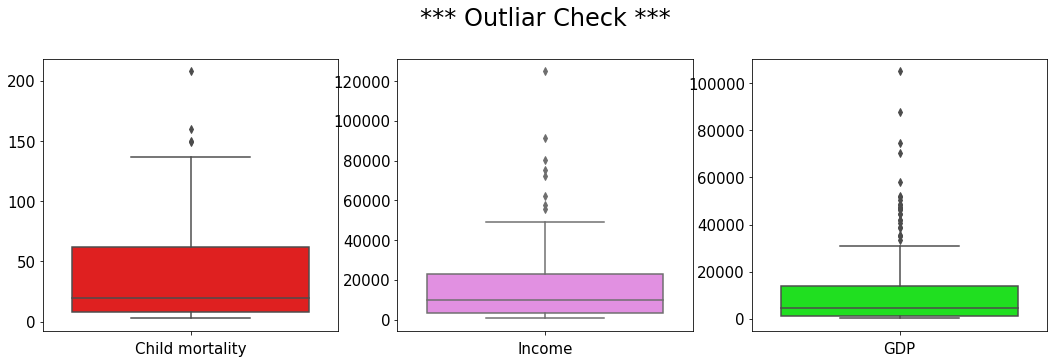

In [38]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(18,5))
plt.title('*** Outliar Check ***', x=-0.7,  y=1.1, fontsize='24')

sns.boxplot(cluster_data['Child mortality'], ax=ax[0], color='red', orient='v')
ax[0].set(xlabel='Child mortality', ylabel='')
sns.boxplot(cluster_data['Income'], ax=ax[1], color='violet', orient='v')
ax[1].set(xlabel='Income', ylabel='')
sns.boxplot(cluster_data['GDP'], ax=ax[2], color='lime', orient='v')
ax[2].set(xlabel='GDP', ylabel='')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Higher no. of outliers in <i>'Income'</i> and <i>'GDP'</i> specify <i>developed nations</i> which we can get rid off if we only need to find countries that needs serious aid from 'HELP' organisation.
</div>

In [39]:
cluster_data.describe()

Child mortality         Income            GDP
count       167.000000     167.000000     167.000000
mean         38.270060   17144.688623   12964.155689
std          40.328931   19278.067698   18328.704809
min           2.600000     609.000000     231.000000
25%           8.250000    3355.000000    1330.000000
50%          19.300000    9960.000000    4660.000000
75%          62.100000   22800.000000   14050.000000
max         208.000000  125000.000000  105000.000000

## Outliar treatment

In [40]:
# outlier treatment for Income
Q1 = cluster_data['Income'].quantile(0.05)
Q3 = cluster_data['Income'].quantile(0.75)
IQR = Q3 - Q1
cluster_data = cluster_data[(cluster_data['Income'] >= Q1 - 1.5*IQR) & (cluster_data['Income'] <= Q3 + 1.5*IQR)]

# outlier treatment for GDP
Q1 = cluster_data['GDP'].quantile(0.05)
Q3 = cluster_data['GDP'].quantile(0.75)
IQR = Q3 - Q1
cluster_data = cluster_data[(cluster_data['GDP'] >= Q1 - 1.5*IQR) & (cluster_data['GDP'] <= Q3 + 1.5*IQR)]

<div class="alert alert-block alert-info">
<b>Note:</b> We are removing upper outliers only from <i>'Income'</i> and <i>'GDP'</i> as they have larger no. of outliers and larger range compared to <i>'Child mortality'</i>. Also we are taking 75th quantile as we won't need super high <i>'Income'</i> and <i>'GDP'</i> of <i>developed countries</i> to find countries that are in serious need of aid from 'HELP' organization.
</div>

In [41]:
print(cluster_data.shape)
cluster_data.reset_index(drop=True, inplace=True)
cluster_data.head()

(139, 4)


Country  Child mortality  Income    GDP
0          Afghanistan             90.2    1610    553
1              Albania             16.6    9930   4090
2              Algeria             27.3   12900   4460
3               Angola            119.0    5900   3530
4  Antigua and Barbuda             10.3   19100  12200

<div class="alert alert-block alert-info">
<b>Note:</b> We still have 83% of data.  
</div>

## Outliar recheck

In [42]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(18,5))
plt.title('*** Outliar Recheck ***', x=-0.7,  y=1.1, fontsize='24')

sns.boxplot(cluster_data['Child mortality'], ax=ax[0], color='red', orient='v')
ax[0].set(xlabel='Child mortality', ylabel='')
sns.boxplot(cluster_data['Income'], ax=ax[1], color='violet', orient='v')
ax[1].set(xlabel='Income', ylabel='')
sns.boxplot(cluster_data['GDP'], ax=ax[2], color='lime', orient='v')
ax[2].set(xlabel='GDP', ylabel='')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> We now have tolerable amount of outliers and better range.  
</div>

In [43]:
cluster_data.describe()

Child mortality        Income           GDP
count       139.000000    139.000000    139.000000
mean         44.978417  10481.028777   5815.208633
std          41.049583   9493.098757   6202.693271
min           3.200000    609.000000    231.000000
25%          14.450000   2675.000000   1185.000000
50%          27.300000   7820.000000   3530.000000
75%          64.150000  15650.000000   8215.000000
max         208.000000  45400.000000  28000.000000

## Rescaling

In [44]:
# rescaling
model_data = cluster_data[['Child mortality', 'Income', 'GDP']]

# instantiate
scaler = MinMaxScaler()

# fit_transform
model_data_scaled = scaler.fit_transform(model_data)
print(model_data_scaled.shape)

model_data_scaled = pd.DataFrame(model_data_scaled)
model_data_scaled.columns = ['Child mortality', 'Income', 'GDP']
model_data_scaled.head()

(139, 3)


Child mortality    Income       GDP
0         0.424805  0.022348  0.011596
1         0.065430  0.208100  0.138968
2         0.117676  0.274408  0.152292
3         0.565430  0.118126  0.118802
4         0.034668  0.412828  0.431020

In [45]:
model_data_scaled.describe()

Child mortality      Income         GDP
count       139.000000  139.000000  139.000000
mean          0.203996    0.220402    0.201095
std           0.200437    0.211942    0.223368
min           0.000000    0.000000    0.000000
25%           0.054932    0.046125    0.034355
50%           0.117676    0.160992    0.118802
75%           0.297607    0.335804    0.287515
max           1.000000    1.000000    1.000000

In [46]:
# reinserting 'Country' column after scaling for future use
# model_data_scaled['Country'] = cluster_data['Country']
# print(model_data_scaled.shape)
# model_data_scaled.head()

# Elbow Curve & Sihlouette score method

## i. 'Child Mortality' and 'Income' for clustering

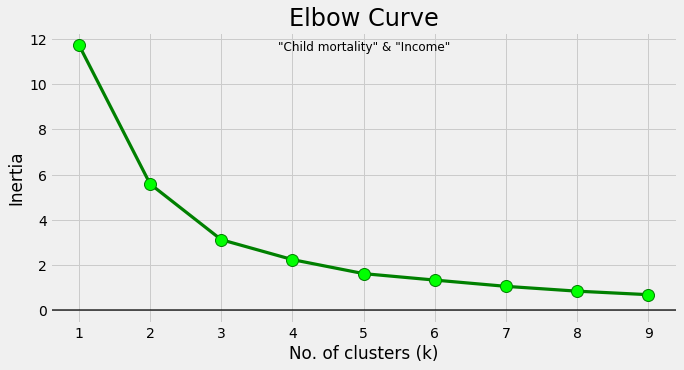

In [47]:
n_cluster_max = 10
wcss = []

# Selecting 'Child Moratality' and 'Income' for clustering
cluster_set1 = model_data_scaled.iloc[:, [0,1]].values

for cluster in range(1, n_cluster_max):    
    km = KMeans(n_clusters=cluster, init='k-means++', random_state=50)
    km.fit(cluster_set1)
    wcss.append(km.inertia_)
    
x_axis = range(1, n_cluster_max)

with plt.style.context('fivethirtyeight'):    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.plot(x_axis, wcss, linewidth=3.2, color='green', marker='o', markerfacecolor='lime', markersize=12)
    ax.axhline(y = 0., color = 'black', linewidth = 1.8, alpha = .7)
    ax.set(xlabel='No. of clusters (k)', ylabel='Inertia')
    plt.title('Elbow Curve', fontsize='24')    
    plt.text(x=3.8, y=11.5, s='"Child mortality" & "Income"',fontsize='12') 

<div class="alert alert-block alert-info">
<b>Note:</b> For clusters between 'Child mortality' vs 'Income', 2 and 3 seem suitable no. of clusters since it at these points it shows sharp elbow curving points. But it is better to take 3 as final no. of clusters. Let us reconsider this by using sihlouette score.
</div>

### Sihlouette score for the above cluster set ('Child mortality' vs 'Income')

For 2,the average silhouette_score is 0.48
For 3,the average silhouette_score is 0.48
For 4,the average silhouette_score is 0.45
For 5,the average silhouette_score is 0.46


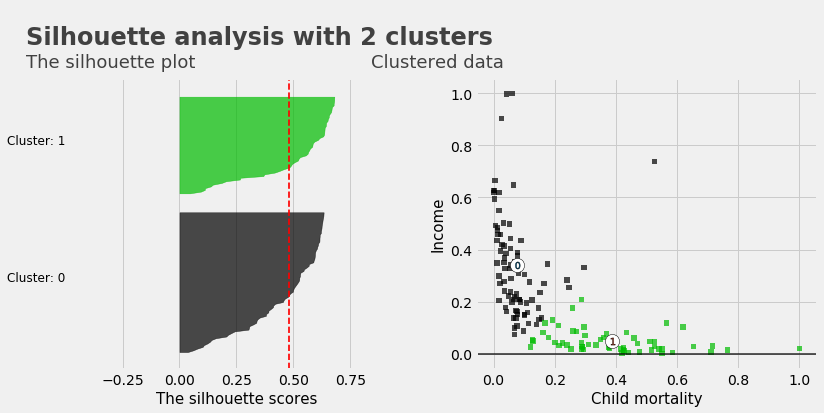

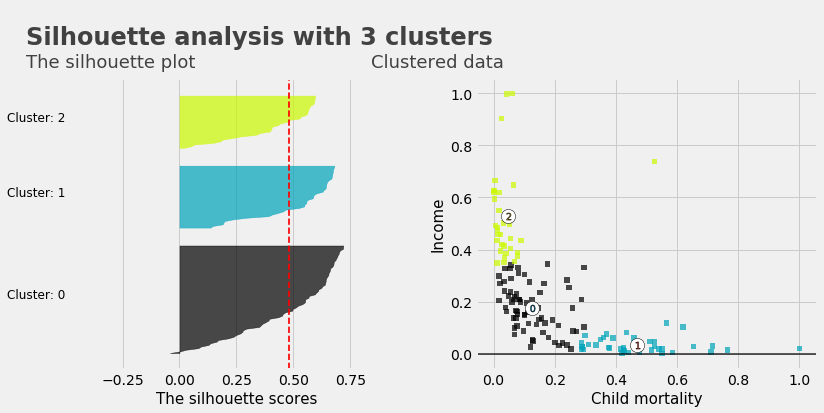

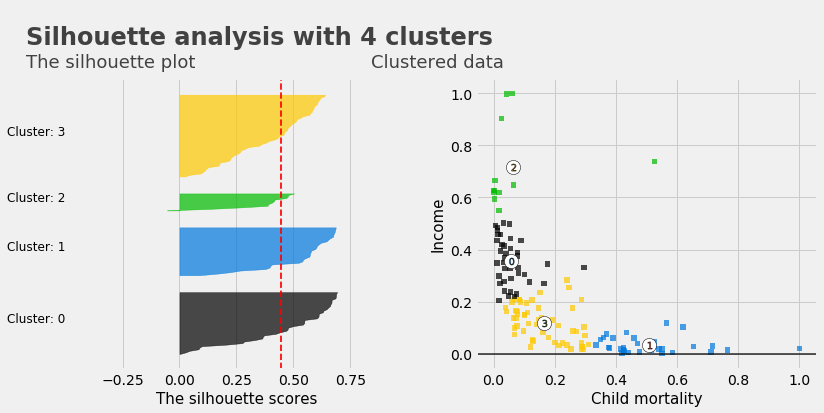

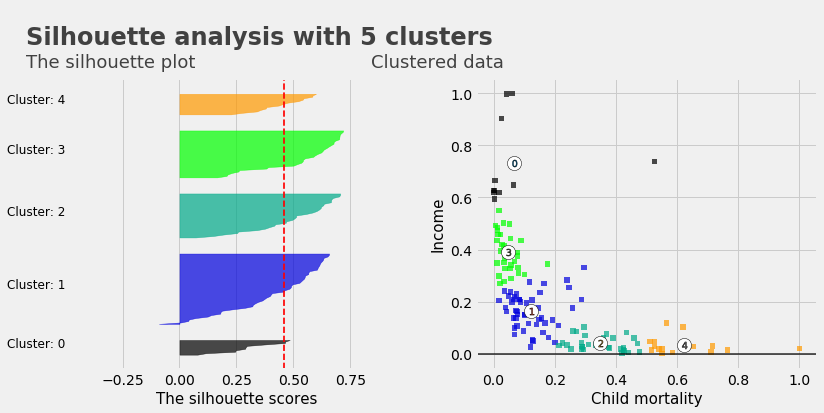

In [48]:
# no. of clusters to be chosen from
range_n_clusters = [2, 3, 4, 5]
colnames = list(model_data_scaled.iloc[:, [0,1]].columns.values)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    
    with plt.style.context('fivethirtyeight'):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
        ax1.set_xlim([-0.5, 1])
        ax1.set_ylim([0, len(cluster_set1) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(cluster_set1)
        silhouette_avg = silhouette_score(cluster_set1, cluster_labels)
        
        print(f"For {n_clusters},the average silhouette_score is {silhouette_avg:.2f}")
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(cluster_set1, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, 
                              edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, f"Cluster: {i}", horizontalalignment ='right', fontsize=12)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_xlim([-0.5, 1])
        ax1.set_xlabel("The silhouette scores", fontsize=15)

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, linewidth = 1.7, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([ -0.25, 0, 0.25, 0.5, 0.75])
     
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(cluster_set1[:, 0], cluster_set1[:, 1], marker='s', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.axhline(y = 0., color = 'black', linewidth = 1.8, alpha = .7)
        ax2.set_xlabel(colnames[0], fontsize=15)
        ax2.set_ylabel(colnames[1], fontsize=15)
        
        title = f"Silhouette analysis with {n_clusters} clusters" 
        subtitle_one = f"The silhouette plot"
        subtitle_two = f"Clustered data"
        ax1.text(x=-0.05, y=1.18, s=title, fontsize=24, fontweight='semibold', color='#414141', transform=ax.transAxes)
        ax1.text(x=-0.05, y=1.1, s=subtitle_one, fontsize=18, color='#414141', transform=ax.transAxes)
        ax2.text(x=0.5, y=1.1, s=subtitle_two, fontsize=18, color='#414141', transform=ax.transAxes)

<div class="alert alert-block alert-danger">
<b>Note:</b> After looking at the scores and the cluster patterns from the above graph for clusters between 'Child mortality' vs 'Income', we can finalise <b>k=3</b>.
</div>

## ii. 'Child Moratality' and 'GDP' for clustering

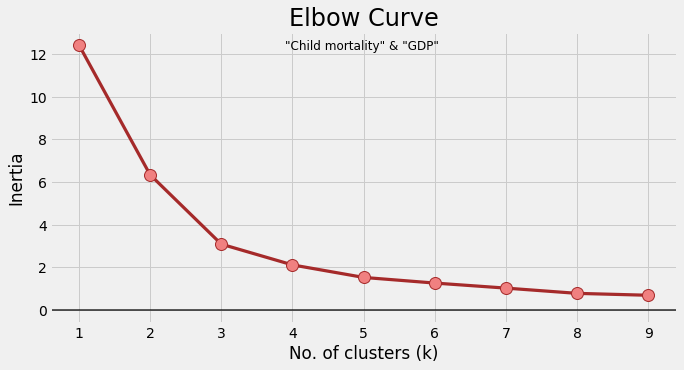

In [49]:
n_cluster_max = 10
wcss = []

# Selecting 'Child Moratality' and 'GDP' for clustering
cluster_set2 = model_data_scaled.iloc[:, [0,2]].values

for cluster in range(1, n_cluster_max):    
    km = KMeans(n_clusters=cluster, init='k-means++', random_state=50)
    km.fit(cluster_set2)
    wcss.append(km.inertia_)
    
x_axis = range(1, n_cluster_max)

with plt.style.context('fivethirtyeight'):    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.plot(x_axis, wcss, linewidth=3.2, color='brown', marker='o', markerfacecolor='lightcoral', markersize=12)
    ax.axhline(y = 0., color = 'black', linewidth = 1.8, alpha = .7)
    ax.set(xlabel='No. of clusters (k)', ylabel='Inertia')
    plt.title('Elbow Curve', fontsize='24')    
    plt.text(x=3.9, y=12.2, s='"Child mortality" & "GDP"',fontsize='12') 

<div class="alert alert-block alert-info">
<b>Note:</b> For clusters between 'Child mortality' vs 'GDP', 3 seems suitable no. of clusters because it shows sharp elbow curving point. We'll reconsider this by using sihlouette score.
</div>

### Sihlouette score for the above cluster set ('Child mortality' vs 'GDP')

For 2,the average silhouette_score is 0.47
For 3,the average silhouette_score is 0.51
For 4,the average silhouette_score is 0.49
For 5,the average silhouette_score is 0.48


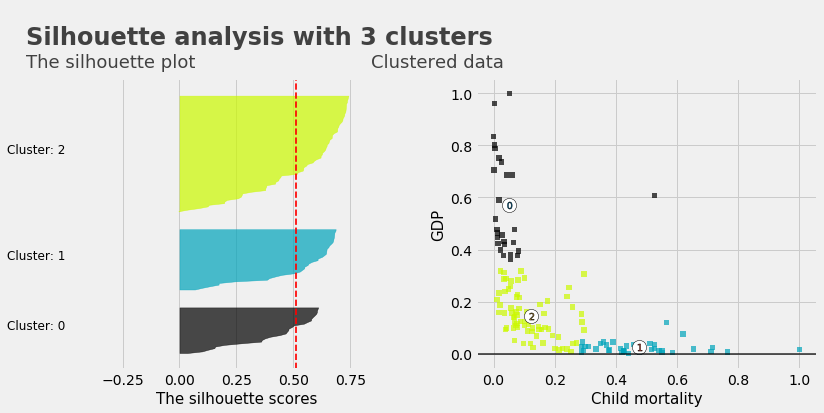

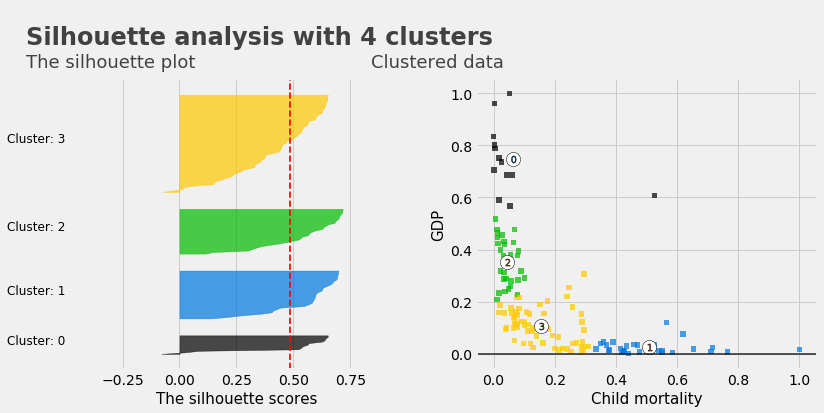

In [50]:
# no. of clusters to be chosen from
range_n_clusters = [2, 3, 4, 5]
colnames = list(model_data_scaled.iloc[:, [0,2]].columns.values)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    
    with plt.style.context('fivethirtyeight'):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))
        ax1.set_xlim([-0.5, 1])
        ax1.set_ylim([0, len(cluster_set2) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(cluster_set2)
        silhouette_avg = silhouette_score(cluster_set2, cluster_labels)
        
        print(f"For {n_clusters},the average silhouette_score is {silhouette_avg:.2f}")
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(cluster_set2, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, 
                              edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, f"Cluster: {i}", horizontalalignment ='right', fontsize=12)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_xlim([-0.5, 1])
        ax1.set_xlabel("The silhouette scores", fontsize=15)

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, linewidth = 1.7, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([ -0.25, 0, 0.25, 0.5, 0.75])
     
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(cluster_set2[:, 0], cluster_set2[:, 1], marker='s', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.axhline(y = 0., color = 'black', linewidth = 1.8, alpha = .7)
        ax2.set_xlabel(colnames[0], fontsize=15)
        ax2.set_ylabel(colnames[1], fontsize=15)
        
        title = f"Silhouette analysis with {n_clusters} clusters" 
        subtitle_one = f"The silhouette plot"
        subtitle_two = f"Clustered data"
        ax1.text(x=-0.05, y=1.18, s=title, fontsize=24, fontweight='semibold', color='#414141', transform=ax.transAxes)
        ax1.text(x=-0.05, y=1.1, s=subtitle_one, fontsize=18, color='#414141', transform=ax.transAxes)
        ax2.text(x=0.5, y=1.1, s=subtitle_two, fontsize=18, color='#414141', transform=ax.transAxes)

<div class="alert alert-block alert-danger">
<b>Note:</b> After looking at the scores and the cluster patterns from the above graph for clusters between 'Child mortality' vs 'GDP', we can finalise <b>k=3</b>.
</div>

## iii. 'Income' and 'GDP' for clustering

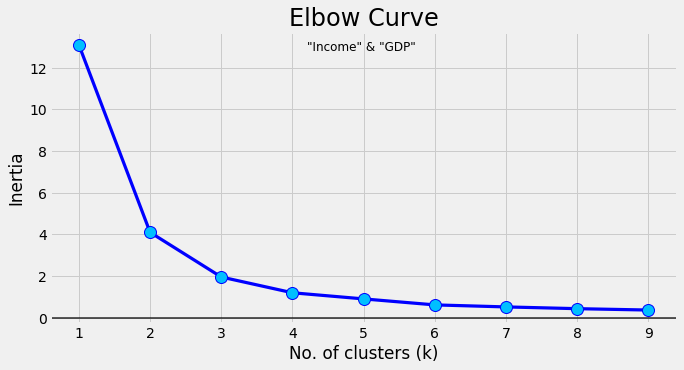

In [51]:
n_cluster_max = 10
wcss = []

# Selecting 'Income' and 'GDP' for clustering
cluster_set3 = model_data_scaled.iloc[:, [1,2]].values

for cluster in range(1, n_cluster_max):    
    km = KMeans(n_clusters=cluster, init='k-means++', random_state=50)
    km.fit(cluster_set3)
    wcss.append(km.inertia_)
    
x_axis = range(1, n_cluster_max)

with plt.style.context('fivethirtyeight'):    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.plot(x_axis, wcss, linewidth=3.2, color='blue', marker='o', markerfacecolor='deepskyblue', markersize=12)
    ax.axhline(y = 0., color = 'black', linewidth = 1.8, alpha = .7)
    ax.set(xlabel='No. of clusters (k)', ylabel='Inertia')
    plt.title('Elbow Curve', fontsize='24')    
    plt.text(x=4.2, y=12.8, s='"Income" & "GDP"',fontsize='12') 

<div class="alert alert-block alert-info">
<b>Note:</b> For clusters between 'Income' vs 'GDP', 2 seems suitable no. of clusters since it shows sharp elbow curving point. We'll reconsider this by using sihlouette score.
</div>

### Sihlouette score for the above cluster set ('Income' vs 'GDP')

For 2,the average silhouette_score is 0.65
For 3,the average silhouette_score is 0.62
For 4,the average silhouette_score is 0.57
For 5,the average silhouette_score is 0.57


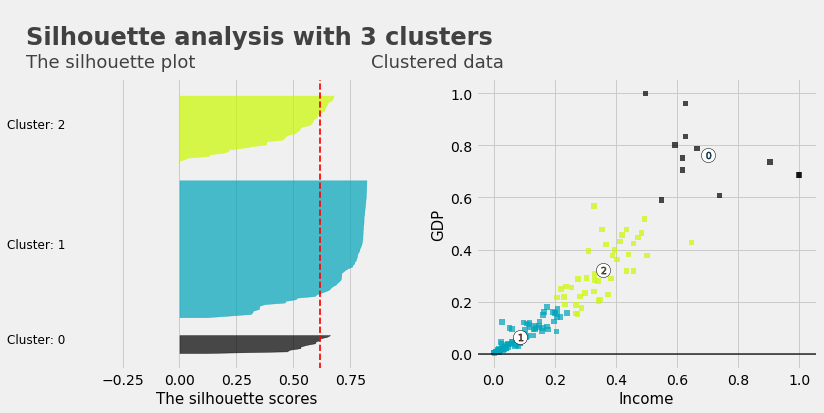

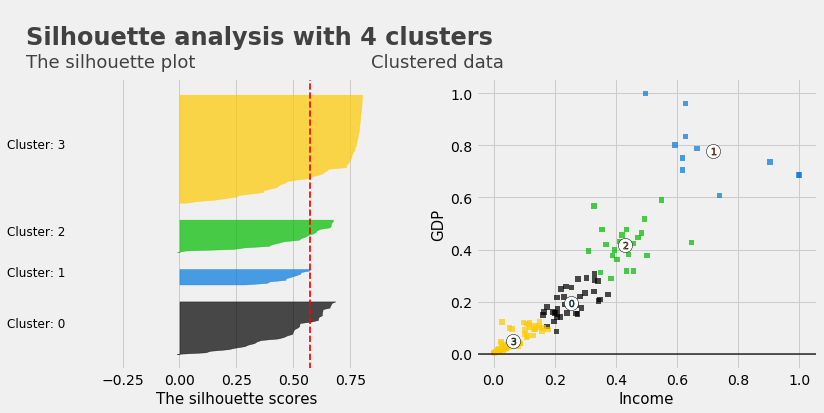

In [52]:
# no. of clusters to be chosen from
range_n_clusters = [2, 3, 4, 5]
colnames = list(model_data_scaled.iloc[:, [1,2]].columns.values)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    
    with plt.style.context('fivethirtyeight'):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
        ax1.set_xlim([-0.5, 1])
        ax1.set_ylim([0, len(cluster_set3) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(cluster_set3)
        silhouette_avg = silhouette_score(cluster_set3, cluster_labels)
        
        print(f"For {n_clusters},the average silhouette_score is {silhouette_avg:.2f}")
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(cluster_set3, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, 
                              edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, f"Cluster: {i}", horizontalalignment ='right', fontsize=12)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_xlim([-0.5, 1])
        ax1.set_xlabel("The silhouette scores", fontsize=15)

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, linewidth = 1.7, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([ -0.25, 0, 0.25, 0.5, 0.75])
     
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(cluster_set3[:, 0], cluster_set3[:, 1], marker='s', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.axhline(y = 0., color = 'black', linewidth = 1.8, alpha = .7)
        ax2.set_xlabel(colnames[0], fontsize=15)
        ax2.set_ylabel(colnames[1], fontsize=15)
        
        title = f"Silhouette analysis with {n_clusters} clusters" 
        subtitle_one = f"The silhouette plot"
        subtitle_two = f"Clustered data"
        ax1.text(x=-0.05, y=1.18, s=title, fontsize=24, fontweight='semibold', color='#414141', transform=ax.transAxes)
        ax1.text(x=-0.05, y=1.1, s=subtitle_one, fontsize=18, color='#414141', transform=ax.transAxes)
        ax2.text(x=0.5, y=1.1, s=subtitle_two, fontsize=18, color='#414141', transform=ax.transAxes)

<div class="alert alert-block alert-danger">
<b>Note:</b> After looking at the scores and the cluster patterns from the above graph for clusters between 'Income' vs 'GDP', we can finalise <b>k=2</b>.
</div>

## Applying K-means algorithm

### i. "Income" vs "Child mortality"

In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=50)
kmeans.fit(model_data_scaled[["Child mortality", "Income"]])
centers = kmeans.cluster_centers_
model_data_scaled['Cluster_income_mortality'] = kmeans.labels_

In [54]:
kmeans.labels_  # cluster label for "Income" vs "Child mortality"

array([1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 1])

In [55]:
#Scatter plot to show final clusters
fig = px.scatter(model_data_scaled, x="Income", y="Child mortality", hover_data=['Cluster_income_mortality'], width=800, height=400)
fig.update_traces(marker=dict(size=8, color=model_data_scaled['Cluster_income_mortality'], colorscale="bluered"))
fig.update_layout(
    title=go.layout.Title(text="Clusters for Income vs Child mortality", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Income", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Child mortality", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    
    shapes=[dict(type="circle", xref="x", yref="y", x0=-0.05, y0=0.25, x1=0.16, y1=1.07, line_color="LightSeaGreen")]
    )   
fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> After finalising <b>k=3</b> for "Income" vs "Child mortality", we get the above graph with 3 clusters. The encirled area shows <b>cluster 1</b>. Hover over the points to check. We'll extract countries from this area.
</div>

### ii. "GDP" vs "Child mortality"

In [56]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=50)
kmeans.fit(model_data_scaled[["Child mortality", "GDP"]])
centers = kmeans.cluster_centers_
model_data_scaled['Cluster_GDP_mortality'] = kmeans.labels_

In [57]:
kmeans.labels_  # cluster label for "GDP" vs "Child mortality"

array([1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 0, 0, 1])

In [58]:
#Scatter plot to show final clusters
fig = px.scatter(model_data_scaled, x="GDP", y="Child mortality", hover_data=['Cluster_GDP_mortality'], width=800, height=400)
fig.update_traces(marker=dict(size=8, color=model_data_scaled['Cluster_GDP_mortality'], colorscale="rainbow"))
fig.update_layout(
    title=go.layout.Title(text="Clusters for GDP vs Child mortality", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="GDP", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Child mortality", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    shapes=[dict(type="circle", xref="x", yref="y", x0=-0.05, y0=0.25, x1=0.16, y1=1.07, line_color="LightSeaGreen")]
    )                                       
fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> After finalising <b>k=3</b> for "GDP" vs "Child mortality", we get the above graph with 3 clusters. The encirled area shows <b>cluster 1</b>. Hover over the points to check. We'll extract countries from this area.
</div>

### iii. "Income" vs "GDP"

In [59]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, random_state=50)
kmeans.fit(model_data_scaled[["GDP", "Income"]])
centers = kmeans.cluster_centers_
model_data_scaled['Cluster_income_GDP'] = kmeans.labels_

In [60]:
kmeans.labels_ # cluster labels for "Income" vs "GDP"

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0])

In [61]:
#Scatter plot to show final clusters
fig = px.scatter(model_data_scaled, x="Income", y="GDP", hover_data=['Cluster_income_GDP'], width=800, height=400)
fig.update_traces(marker=dict(size=8, color=model_data_scaled['Cluster_income_GDP'], colorscale="temps"))
fig.update_layout(
    title=go.layout.Title(text=" Clusters for Income vs GDP", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Income", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="GDP", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    shapes=[dict(type="circle", xref="x", yref="y", x0=-0.05, y0=-0.05, x1=0.45, y1=0.3, line_color="LightSeaGreen")]
    )                                       
fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> After finalising <b>k=2</b> for "Income" vs "GDP", we get the above graph with 2 clusters. The encirled area shows <b>cluster 0</b>. Hover over the points to check. We'll extract countries from this area.
</div>

## Extracting countries after K-means clustering method

In [62]:
# using the inverse_transform to get old original data

old_data = scaler.inverse_transform(model_data_scaled[["Child mortality", "Income", "GDP"]])
old_data = pd.DataFrame(old_data)
old_data.columns = ['Child mortality', 'Income', 'GDP']
old_data['Cluster_income_mortality'] = model_data_scaled['Cluster_income_mortality']  # Adding cluster labels
old_data['Cluster_GDP_mortality'] = model_data_scaled['Cluster_GDP_mortality']        # Adding cluster labels
old_data['Cluster_income_GDP'] = model_data_scaled['Cluster_income_GDP']              # Adding cluster labels
old_data['Country'] = cluster_data['Country']
columns_titles = ['Country', 'Child mortality', 'Income', 'GDP', 'Cluster_income_mortality',
                  'Cluster_GDP_mortality', 'Cluster_income_GDP']
old_data=old_data.reindex(columns=columns_titles)
print(old_data.shape)
old_data.head()

(139, 7)


Country  Child mortality   Income      GDP  \
0          Afghanistan             90.2   1610.0    553.0   
1              Albania             16.6   9930.0   4090.0   
2              Algeria             27.3  12900.0   4460.0   
3               Angola            119.0   5900.0   3530.0   
4  Antigua and Barbuda             10.3  19100.0  12200.0   

   Cluster_income_mortality  Cluster_GDP_mortality  Cluster_income_GDP  
0                         1                      1                   0  
1                         2                      0                   0  
2                         2                      0                   0  
3                         1                      1                   0  
4                         0                      2                   1

In [63]:
# using kmeans clusters labels to get required countries 

kmeans_countries = old_data.loc[(old_data['Cluster_income_mortality'] == 1) &  # cluster_1
                        (old_data['Cluster_GDP_mortality'] == 1) &             # cluster_1
                        (old_data['Cluster_income_GDP'] == 0)]                 # cluster_0

<div class="alert alert-block alert-info">
<b>Note:</b> Extracting countries from encirled areas of <b>cluster_1</b> from <i>'Cluster_income_mortality'</i> and <i>'Cluster_GDP_mortality'</i> and <b>cluster_0</b> from <i>'Cluster_income_GDP'</i>
</div>

In [64]:
# kmeans countries

print(kmeans_countries.shape)
kmeans_countries.head()

(38, 7)


Country  Child mortality  Income     GDP  Cluster_income_mortality  \
0    Afghanistan             90.2  1610.0   553.0                         1   
3         Angola            119.0  5900.0  3530.0                         1   
14         Benin            111.0  1820.0   758.0                         1   
21  Burkina Faso            116.0  1430.0   575.0                         1   
22       Burundi             93.6   764.0   231.0                         1   

    Cluster_GDP_mortality  Cluster_income_GDP  
0                       1                   0  
3                       1                   0  
14                      1                   0  
21                      1                   0  
22                      1                   0

<div class="alert alert-block alert-info">
<b>Note:</b> <b>Looks like by using k-means clustering technique we got 38 countries.</b> Also remember that we got 13 countries by using EDA alone.
</div>

### Comparing EDA result with K-means clustering model result

In [65]:
common_list = pd.DataFrame(list(set(Countries['Country']) & set(kmeans_countries['Country'])))
common_list.columns = ['Country']
common_list.sort_values("Country", axis = 0, ascending = True, inplace = True)
common_list.reset_index(drop=True, inplace=True)
common_list

Country
0                Afghanistan
1               Burkina Faso
2                    Burundi
3   Central African Republic
4           Congo, Dem. Rep.
5                     Guinea
6              Guinea-Bissau
7                      Haiti
8                     Malawi
9                 Mozambique
10                     Niger
11              Sierra Leone
12                      Togo

<div class="alert alert-block alert-info">
<b>Note:</b> This check tells that all the 13 countries that we got through EDA are present in the list of 38 countries of k-means cluster result !!!
</div>

In [66]:
# dropping old labels before hierarchical clustering

model_data_scaled.drop(['Cluster_income_mortality', 'Cluster_GDP_mortality', 'Cluster_income_GDP'], axis = 1, inplace = True)
print(model_data_scaled.shape)
model_data_scaled.head()

(139, 3)


Child mortality    Income       GDP
0         0.424805  0.022348  0.011596
1         0.065430  0.208100  0.138968
2         0.117676  0.274408  0.152292
3         0.565430  0.118126  0.118802
4         0.034668  0.412828  0.431020

# Hierarchical Clustering method

## i. "Child mortality" vs "Income"

In [67]:
hierarchy.set_link_color_palette(['deepskyblue', 'deeppink', 'orange', 'springgreen'])  # color order
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
mergings1 = linkage(model_data_scaled[["Child mortality", "Income"]], method="single", metric='euclidean')  # single linkage
mergings2 = linkage(model_data_scaled[["Child mortality", "Income"]], method="complete", metric='euclidean')  # complete linkage
dn1 = hierarchy.dendrogram(mergings1, ax=axes[0])
dn2 = hierarchy.dendrogram(mergings2, ax=axes[1])
plt.title('*** "Child mortality" vs "Income" ***', x=0.5,  y=2.4, fontsize='24')
plt.text(x=600.0, y=3.2, s='Single Linkage', fontsize=18)
plt.text(x=600.0, y=1.5, s='Complete Linkage', fontsize=18)
plt.show()

<div class="alert alert-block alert-danger">
<b>Note:</b> After looking at the dendrograms and the cluster patterns for clusters between 'Child mortality' vs 'Income', we can finalise <b>k=3</b>, this is same k as we got through elbow curves and silhouette scores method.
</div>

In [68]:
hierarchy_income_mortality = cut_tree(mergings2, n_clusters=3).reshape(-1, )
model_data_scaled['hierarchy_income_mortality'] = hierarchy_income_mortality
hierarchy_income_mortality

array([0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [69]:
#Scatter plot to show final clusters
fig = px.scatter(model_data_scaled, x="Income", y="Child mortality", hover_data=['hierarchy_income_mortality'], width=800, height=400)
fig.update_traces(marker=dict(size=8, color=model_data_scaled['hierarchy_income_mortality'], colorscale="bluered"))
fig.update_layout(
    title=go.layout.Title(text="Clusters for Income vs Child mortality", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Income", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Child mortality", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    
    shapes=[dict(type="circle", xref="x", yref="y", x0=-0.05, y0=0.46, x1=0.16, y1=1.07, line_color="LightSeaGreen")]
    )   
fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> After finalising <b>k=3</b> for "Income" vs "Child mortality", we get the above graph with 3 clusters. The encirled area shows <b>cluster 1</b>. Hover over the points to check. We'll extract countries from this area.
</div>

## ii. "Child mortality" vs "GDP"

In [70]:
hierarchy.set_link_color_palette(['red', 'green', 'orange', 'deeppink'])   # color order
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
mergings1 = linkage(model_data_scaled[["Child mortality", "GDP"]], method="single", metric='euclidean')    # single linkage
mergings2 = linkage(model_data_scaled[["Child mortality", "GDP"]], method="complete", metric='euclidean')   # complete linkage
dn1 = hierarchy.dendrogram(mergings1, ax=axes[0])
dn2 = hierarchy.dendrogram(mergings2, ax=axes[1])
plt.title('*** "Child mortality" vs "GDP" ***', x=0.5,  y=2.4, fontsize='24')
plt.text(x=600.0, y=3.2, s='Single Linkage', fontsize=18)
plt.text(x=600.0, y=1.5, s='Complete Linkage', fontsize=18)
plt.show()

<div class="alert alert-block alert-danger">
<b>Note:</b> After looking at the dendrograms and the cluster patterns for clusters between 'Child mortality' vs 'GDP', we can finalise <b>k=3</b>, this is same k as we got through elbow curves and silhouette scores method.
</div>

In [71]:
hierarchy_GDP_mortality = cut_tree(mergings2, n_clusters=3).reshape(-1, )
model_data_scaled['hierarchy_GDP_mortality'] = hierarchy_GDP_mortality
hierarchy_GDP_mortality

array([0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 1, 1, 0])

In [72]:
#Scatter plot to show final clusters
fig = px.scatter(model_data_scaled, x="GDP", y="Child mortality", hover_data=['hierarchy_GDP_mortality'], width=800, height=400)
fig.update_traces(marker=dict(size=8, color=model_data_scaled['hierarchy_GDP_mortality'], colorscale="rainbow"))
fig.update_layout(
    title=go.layout.Title(text="Clusters for GDP vs Child mortality", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="GDP", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Child mortality", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    shapes=[dict(type="circle", xref="x", yref="y", x0=-0.05, y0=0.32, x1=0.16, y1=1.07, line_color="LightSeaGreen")]
    )                                       
fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> After finalising <b>k=3</b> for "GDP" vs "Child mortality", we get the above graph with 3 clusters. The encirled area shows <b>cluster 0</b>. Hover over the points to check. We'll extract countries from this area.
</div>

## iii. "GDP" vs "Income"

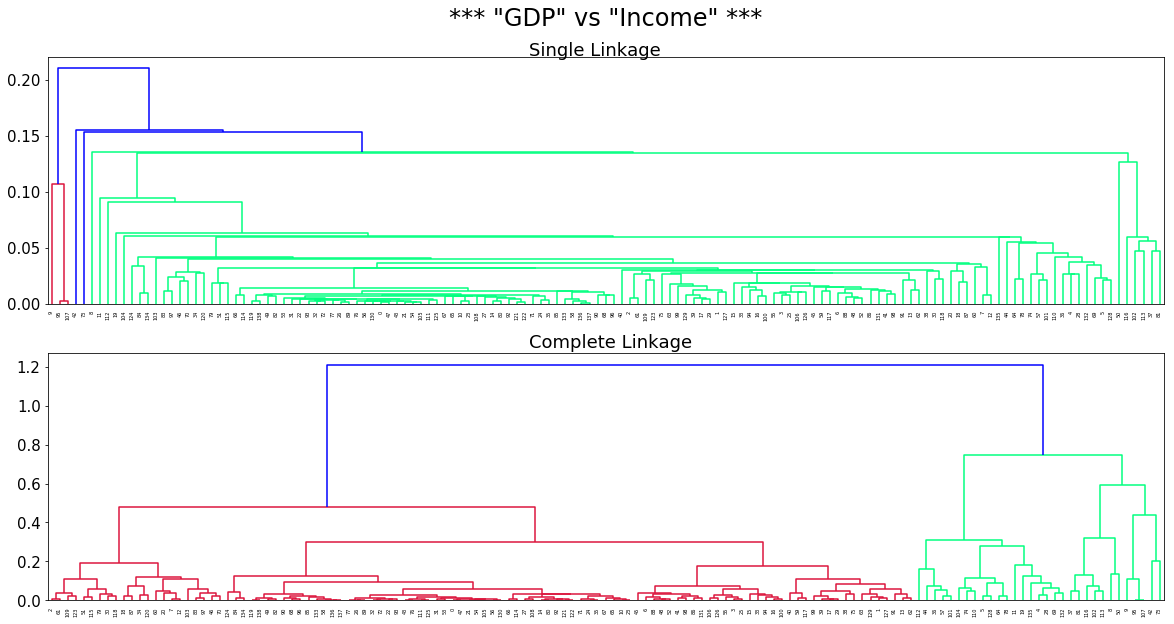

In [73]:
hierarchy.set_link_color_palette(['crimson', 'springgreen', 'turquoise', 'gold'])   # color order
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
mergings1 = linkage(model_data_scaled[["GDP", "Income"]], method="single", metric='euclidean')    # single linkage
mergings2 = linkage(model_data_scaled[["GDP", "Income"]], method="complete", metric='euclidean')   # complete linkage
dn1 = hierarchy.dendrogram(mergings1, ax=axes[0])
dn2 = hierarchy.dendrogram(mergings2, ax=axes[1])
plt.title('*** "GDP" vs "Income" ***', x=0.5,  y=2.3, fontsize='24')
plt.text(x=600.0, y=2.8, s='Single Linkage', fontsize=18)
plt.text(x=600.0, y=1.3, s='Complete Linkage', fontsize=18)
plt.show()

<div class="alert alert-block alert-danger">
<b>Note:</b> After looking at the dendrograms and the cluster patterns for clusters between 'GDP' vs 'Income', we can finalise <b>k=2</b>, this is same k as we got through elbow curves and silhouette scores method.
</div>

In [74]:
hierarchy_GDP_income = cut_tree(mergings2, n_clusters=2).reshape(-1, )
model_data_scaled['hierarchy_GDP_income'] = hierarchy_GDP_income
hierarchy_GDP_income

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0])

In [75]:
#Scatter plot to show final clusters
fig = px.scatter(model_data_scaled, x="Income", y="GDP", hover_data=['hierarchy_GDP_income'], width=800, height=400)
fig.update_traces(marker=dict(size=8, color=model_data_scaled['hierarchy_GDP_income'], colorscale="temps"))
fig.update_layout(
    title=go.layout.Title(text=" Clusters for Income vs GDP", font=dict(size=24, color='black')),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Income", font=dict(size=18, color='black'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="GDP", font=dict(size=18, color='black'))),
    margin=dict(l=20, r=50, t=50, b=20),
    shapes=[dict(type="circle", xref="x", yref="y", x0=-0.05, y0=-0.05, x1=0.45, y1=0.3, line_color="LightSeaGreen")]
    )                                       
fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b> After finalising <b>k=2</b> for "Income" vs "GDP", we get the above graph with 2 clusters. The encirled area shows <b>cluster 0</b>. Hover over the points to check. We'll extract countries from this area.
</div>

In [76]:
model_data_scaled.head()

Child mortality    Income       GDP  hierarchy_income_mortality  \
0         0.424805  0.022348  0.011596                           0   
1         0.065430  0.208100  0.138968                           0   
2         0.117676  0.274408  0.152292                           0   
3         0.565430  0.118126  0.118802                           1   
4         0.034668  0.412828  0.431020                           2   

   hierarchy_GDP_mortality  hierarchy_GDP_income  
0                        0                     0  
1                        1                     0  
2                        1                     0  
3                        0                     0  
4                        2                     1

## Extracting countries after hierarchical clustering

In [77]:
# using the inverse_transform to get old original data

old_data2 = scaler.inverse_transform(model_data_scaled[["Child mortality", "Income", "GDP"]])
old_data2 = pd.DataFrame(old_data2)
old_data2.columns = ['Child mortality', 'Income', 'GDP']
old_data2['hierarchy_income_mortality'] = model_data_scaled['hierarchy_income_mortality']  # Adding cluster labels
old_data2['hierarchy_GDP_mortality'] = model_data_scaled['hierarchy_GDP_mortality']        # Adding cluster labels
old_data2['hierarchy_GDP_income'] = model_data_scaled['hierarchy_GDP_income']              # Adding cluster labels
old_data2['Country'] = cluster_data['Country']
columns_titles = ['Country', 'Child mortality', 'Income', 'GDP', 'hierarchy_income_mortality',
                  'hierarchy_GDP_mortality', 'hierarchy_GDP_income']
old_data2=old_data2.reindex(columns=columns_titles)
print(old_data2.shape)
old_data2.head()

(139, 7)


Country  Child mortality   Income      GDP  \
0          Afghanistan             90.2   1610.0    553.0   
1              Albania             16.6   9930.0   4090.0   
2              Algeria             27.3  12900.0   4460.0   
3               Angola            119.0   5900.0   3530.0   
4  Antigua and Barbuda             10.3  19100.0  12200.0   

   hierarchy_income_mortality  hierarchy_GDP_mortality  hierarchy_GDP_income  
0                           0                        0                     0  
1                           0                        1                     0  
2                           0                        1                     0  
3                           1                        0                     0  
4                           2                        2                     1

In [78]:
# using kmeans clusters labels to get required countries 

hierarchy_countries = old_data2.loc[(old_data2['hierarchy_income_mortality'] == 1) &  # cluster_1
                        (old_data2['hierarchy_GDP_mortality'] == 0) &             # cluster_1
                        (old_data2['hierarchy_GDP_income'] == 0)]                 # cluster_0

<div class="alert alert-block alert-info">
<b>Note:</b> Extracting countries from encirled areas of <b>cluster_1</b> from <i>'hierarchy_income_mortality'</i> and <b>cluster_0</b> from <i>'hierarchy_GDP_mortality'</i> and <i>'hierarchy_GDP_income'</i>
</div>

In [79]:
# kmeans countries

print(hierarchy_countries.shape)
hierarchy_countries.head()

(16, 7)


Country  Child mortality  Income     GDP  \
3                     Angola            119.0  5900.0  3530.0   
14                     Benin            111.0  1820.0   758.0   
21              Burkina Faso            116.0  1430.0   575.0   
24                  Cameroon            108.0  2660.0  1310.0   
26  Central African Republic            149.0   888.0   446.0   

    hierarchy_income_mortality  hierarchy_GDP_mortality  hierarchy_GDP_income  
3                            1                        0                     0  
14                           1                        0                     0  
21                           1                        0                     0  
24                           1                        0                     0  
26                           1                        0                     0

<div class="alert alert-block alert-info">
<b>Note:</b> <b>Looks like by using hierarchical clustering technique we got 16 countries.</b> Also remember that we got 13 countries by using EDA and 38 countries by using k-means.
</div>

### Comparing  between EDA result, K-means and Hierarchical clustering results

In [80]:
common_list = pd.DataFrame(list(set(Countries['Country']) & 
                                set(hierarchy_countries['Country']) & 
                                set(kmeans_countries['Country'])))
common_list.columns = ['Country']
common_list.sort_values("Country", axis = 0, ascending = True, inplace = True)
common_list.reset_index(drop=True, inplace=True)
common_list

Country
0              Burkina Faso
1  Central African Republic
2          Congo, Dem. Rep.
3                    Guinea
4             Guinea-Bissau
5                     Haiti
6                Mozambique
7                     Niger
8              Sierra Leone

<div class="alert alert-block alert-info">
<b>Note:</b> This check tells that there are 9 common countries that we got through EDA, k-means and hierarchical cluster results !!!
</div>